#                         Assignment 1 - Task 2 Text Pre-Processing 

### Student Name: Roopak TJ
### Student ID: 29567467

Date: 14th April, 2019

Environment: Python 3 and Jupyter notebook
Libraries used: 
* Tabula (for reading and extracting data from pdf tables )
* nltk - natural language toolkit (tokenizer, stemmer, collocations and probabilities)
* matplotlib - For plots

External files used:
* Input file : 29567467.pdf | stopwords_en.txt
* Output file : 29567467_vocab.txt | 29567467_countVec.txt

## Text Pre-Processing
The process basically involves processing and formatting of data which can be fed into differnt machine learning and data analysis processes.The current task mainly covers:
* Extracting data from PDF tables
* Loading the data into Dataframe
* Tokenization
* Case Normalization
* Removing stop words
* Stemming technique
* Count vectorization

## Import libraries

In [1]:
from tabula import read_pdf
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer
from nltk.stem import PorterStemmer
from nltk.probability import *
import matplotlib.pyplot as plt
from pylab import *

In [2]:
!pip install nltk

Using read_pdf function from Tabula package to extract tables in pdf to dataframe.
Parameters: 
* file name
* encoding technique
* spreadsheet indicator boolean

Returns:
* dataframe

In [3]:
# Import pdf to dataframe
df = read_pdf("29567467.pdf",encoding='utf-8', spreadsheet=True, pages='all') 

Understanding the number of rows and columns

In [4]:
df.shape

(200, 3)

In [5]:
df.columns

Index(['Title', 'Synopsis', 'Outcomes'], dtype='object')

On checking the data, it is noticed that some of the values in the cell contains ['NA'] in both Synopsis and Outcomes as seen below. This needs to be removed before text preprocessing

In [6]:
# Some rows have Synopsis and Outcomes as "NA"
df[df["Title"] == "AZA3644"]

,Title,Synopsis,Outcomes
111,AZA3644,The unit is a survey course on the history and...,['NA']


Writing a function which will consider such cases and replace ['NA'] with empty string.

Parameters : String

Return : Same string after removing null cases

In [7]:
def removeNull(s):
    s = str(s)
    if s == "['NA']":
        s = ""
    return s

df["Synopsis"] = df["Synopsis"].apply(removeNull)
df["Outcomes"] = df["Outcomes"].apply(removeNull)

It can be seen that the ['NA'] values has been replaced by empty string 

In [8]:
# Some rows have Synopsis and Outcomes as "NA"
df[df["Title"] == "AZA3644"]
df[df["Title"] == "LAW4227"]

,Title,Synopsis,Outcomes
16,LAW4227,Criminal investigation and procedure involves ...,


Combining 2 columns(Synopsis and Outcomes) into a single column Combination for simplicity

In [9]:
# Create a new column to combine synopsis and outcome
df["Combination"] = df.Synopsis + df.Outcomes

Droping the actual columns which contains redundant data

In [10]:
# Drop synopsis and outcome
df.drop(columns = ['Synopsis', 'Outcomes'], inplace = True, axis=1)

In [11]:
df.columns

Index(['Title', 'Combination'], dtype='object')

Writing a function which will be called in the dataframe column which will perform the case Normalization and make every word except the Noun lower case

In [12]:
def preserveNoun(s):
    s = str(s)
    First = True
    new = ""
    flag = False
    for each in s:
        if flag and each != " ":
            each = each.lower()
            flag = False
        if each == "." or each == "?" or each == "!":
            flag = True
        if First:
            each = each.lower()
            First = False
        new = new + each
    return new

Create a new column to store the value returned from the function

In [13]:
df["new"] = np.NAN
df["new"] = df["Combination"].apply(preserveNoun)
df.head()

,Title,Combination,new
0,ATS3956,"This unit focuses on the histories, theories, ...","this unit focuses on the histories, theories, ..."
1,ATS3116,The unit develops Indonesian linguistic and cu...,the unit develops Indonesian linguistic and cu...
2,APG5337,The unit will explore modern political governa...,the unit will explore modern political governa...
3,ATS1229,This unit aims to provide a basic foundation i...,this unit aims to provide a basic foundation i...
4,IMM3990,This unit will provide high achieving students...,this unit will provide high achieving students...


Droping Combination column

In [14]:
df.drop(columns = ['Combination'], inplace = True, axis=1)
df = df.rename(columns={'new': 'Information'})
df.head()

,Title,Information
0,ATS3956,"this unit focuses on the histories, theories, ..."
1,ATS3116,the unit develops Indonesian linguistic and cu...
2,APG5337,the unit will explore modern political governa...
3,ATS1229,this unit aims to provide a basic foundation i...
4,IMM3990,this unit will provide high achieving students...


Writing a function tokenise which will generate unigrams from the string

Parameters : String (Column value in Information)

Returns : List of unigrams

In [15]:
def tokenise(s):
    s = str(s)
    tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")
    unigram = tokenizer.tokenize(s)
    return unigram
    

In [16]:
df["Information"] = df["Information"].apply(tokenise)
df.head()

,Title,Information
0,ATS3956,"[this, unit, focuses, on, the, histories, theo..."
1,ATS3116,"[the, unit, develops, Indonesian, linguistic, ..."
2,APG5337,"[the, unit, will, explore, modern, political, ..."
3,ATS1229,"[this, unit, aims, to, provide, a, basic, foun..."
4,IMM3990,"[this, unit, will, provide, high, achieving, s..."


bigrams() : Creating some of the multigrams using MWETokenizer. Created a unique set of tokens. Appended the tuples of bigrams and used MWETokenizer to replace the existing values in tokens list to words separated by '_'

In [17]:
def bigrams(s):

    unique_set = list(set(s))
    unique_set.append(("transhistorical", "case", "studies"))
    unique_set.append(("Post-Traumatic", "Stress", "Disorder"))
    unique_set.append(("professional", "competency"))
    unique_set.append(("occupational", "health"))
    
    mwe_tokenizer = MWETokenizer(unique_set)
    uni_and_bigrams = mwe_tokenizer.tokenize(s)
    return uni_and_bigrams

In [18]:
df["Information"] = df["Information"].apply(bigrams)
df.head()

,Title,Information
0,ATS3956,"[this, unit, focuses, on, the, histories, theo..."
1,ATS3116,"[the, unit, develops, Indonesian, linguistic, ..."
2,APG5337,"[the, unit, will, explore, modern, political, ..."
3,ATS1229,"[this, unit, aims, to, provide, a, basic, foun..."
4,IMM3990,"[this, unit, will, provide, high, achieving, s..."


remove_three_or_less() : Function to remove the the words which have length less than 3. Such words are usually a part of stop words.

Parameters: String (Values in the column Information)
    
Returns: Same String with the words of length less than 3 removed 

In [19]:
# Function to remove tokens less than 3

def remove_three_or_less(s):
    new_list = []
    for each in s:
        if len(each) < 3:
            continue
        else:
            new_list.append(each)
            
    return new_list

In [20]:
df["Information"] = df["Information"].apply(remove_three_or_less)
df.head()

,Title,Information
0,ATS3956,"[this, unit, focuses, the, histories, theories..."
1,ATS3116,"[the, unit, develops, Indonesian, linguistic, ..."
2,APG5337,"[the, unit, will, explore, modern, political, ..."
3,ATS1229,"[this, unit, aims, provide, basic, foundation,..."
4,IMM3990,"[this, unit, will, provide, high, achieving, s..."


Provided with a txt file containing stop words. Creating a function to read the data from the stopwords from the .txt file and removing the words from Information column which has words present in the stop words

In [21]:
def remove_stop_words(s):
    
    stop_words = open("stopwords_en.txt", 'r')
    stop_words = stop_words.read()
    stop_words = stop_words.split("\n")
    stopped_list = [w for w in s if w not in stop_words]
    return stopped_list

In [22]:
df["Information"] = df["Information"].apply(remove_stop_words)
df.head()

,Title,Information
0,ATS3956,"[unit, focuses, histories, theories, applicati..."
1,ATS3116,"[unit, develops, Indonesian, linguistic, cultu..."
2,APG5337,"[unit, explore, modern, political, governance,..."
3,ATS1229,"[unit, aims, provide, basic, foundation, basic..."
4,IMM3990,"[unit, provide, high, achieving, students, str..."


Writing a function which will get the words fromt the Information column and stem it to its base form.

In [23]:
def stem(mwe_text):
    
    #tagged_sent = nltk.tag.pos_tag(mwe_text)
    lemmatizer = PorterStemmer()
    
    final_tokens = [lemmatizer.stem(w) for w in mwe_text ]

    return final_tokens

In [24]:
df["Information"] = df["Information"].apply(stem)
df.head()

,Title,Information
0,ATS3956,"[unit, focus, histori, theori, applic, concept..."
1,ATS3116,"[unit, develop, indonesian, linguist, cultur, ..."
2,APG5337,"[unit, explor, modern, polit, govern, mode, au..."
3,ATS1229,"[unit, aim, provid, basic, foundat, basic, lan..."
4,IMM3990,"[unit, provid, high, achiev, student, structur..."


Till now, we were handling tokens for each units. Now, we will iterate through the entire data frame to extract data from all units together into a global token list . Also using "set" to get unique tokens from the list

In [25]:
# Get complete tokens in a list
count = df.shape[0]
tokens = list()
for index, row in df.head(n=count).iterrows():
    for each in row[1]:
        tokens.append(each)
tokens_set = list(set(tokens))
print("The number of global tokens: " + str(len(tokens)))
print("The number of unique tokens: " + str(len(tokens_set)))

The number of global tokens: 20345
The number of unique tokens: 2624


To get the first 200 meaningful bigrams, nltk.collocations.BigramAssocMeasures is used and this will be added to the existing unique set of tokens for updating the tokens already present in the tokens list.

In [26]:
# First 200 meaningful bigrams
import nltk
bigram = nltk.collocations.BigramAssocMeasures()
locater = nltk.collocations.BigramCollocationFinder.from_words(tokens_set)
bestbigrams = locater.nbest(bigram.pmi, 200)    

In [27]:
# Added 200 to the existing set of global tokens
token_set_bi = []

for each in tokens_set:
    token_set_bi.append(each)

for each in bestbigrams:
    token_set_bi.append(each)
    
print("Size of token set for MWE: ",len(token_set_bi))
print("Size of initial unique token list: ", len(tokens_set))

Size of token set for MWE:  2824
Size of initial unique token list:  2624


It can be noticed that the size of unique tokens has increased by 200.

In [28]:
# Changing the values in the existing tokens to bigrams using MWETokenizer class
print("Before updating the bigrams, size of the tokens are : ",len(tokens_set))
mwe_tokenizer = MWETokenizer(token_set_bi)
tokens_set = mwe_tokenizer.tokenize(tokens_set)
print("After updating the bigrams, size of the tokens are : ", len(tokens_set))

Before updating the bigrams, size of the tokens are :  2624
After updating the bigrams, size of the tokens are :  2434


After updating the bigrams, it can be noticed that the size of tokens have decreased below the count of original number of uniqur tokens. This is because we have combined tokens in the process. Alos updating the tokens in the dataframe with bigrams such that frequency can be calculated accurately

In [29]:
def updateColumn(s):
    mwe_tokenizer = MWETokenizer(token_set_bi)
    tokens = mwe_tokenizer.tokenize(s)
    return s

In [30]:
df["Information"] = df["Information"].apply(updateColumn)
df.head()

,Title,Information
0,ATS3956,"[unit, focus, histori, theori, applic, concept..."
1,ATS3116,"[unit, develop, indonesian, linguist, cultur, ..."
2,APG5337,"[unit, explor, modern, polit, govern, mode, au..."
3,ATS1229,"[unit, aim, provid, basic, foundat, basic, lan..."
4,IMM3990,"[unit, provid, high, achiev, student, structur..."


Using getTokenFrequency to get the frequency of tokens as a Dictionary and sorting the dictionary with respect to values to identify the most frequent and rare tokens

In [32]:
def getTokenFrequency(tokens):
    fc = FreqDist(tokens)
    fc = dict(fc)
    return fc

global_token_frequency_dict = getTokenFrequency(tokens)
global_token_frequency_dict = sorted(global_token_frequency_dict.items(), key=lambda x: x[1], reverse=False)
print(global_token_frequency_dict)

[('twenty-first', 1), ('transhistorical_case_studi', 1), ('nineteenth', 1), ('struggl', 1), ('genocid', 1), ('globe', 1), ('colon', 1), ('decolon', 1), ('gender-bas', 1), ('worldwid', 1), ('post-traumatic_stress_disord', 1), ('rememb', 1), ('non-western', 1), ('memoir', 1), ('historiographi', 1), ('televis', 1), ('photographi', 1), ('ethnic', 1), ('serv', 1), ('20th', 1), ('presidenti', 1), ('parliamentari', 1), ('south-east', 1), ('formalis', 1), ('persist', 1), ('persever', 1), ('autocrat', 1), ('authoritarian', 1), ('intric', 1), ('highest', 1), ('succinctli', 1), ('elementari', 1), ('up-to', 1), ('multi-part', 1), ('virtuoso', 1), ('professional_compet', 1), ('socio-linguist', 1), ('dialogu', 1), ('monologu', 1), ('apologis', 1), ('hope', 1), ('gratitud', 1), ('japan-rel', 1), ('kanji', 1), ('240', 1), ('curv', 1), ('short-term', 1), ('medium-term', 1), ('usag', 1), ('wisdom', 1), ('hard', 1), ('copi', 1), ('exemplifi', 1), ('principles-bas', 1), ('adequ', 1), ('milieu', 1), ('icm'

In [33]:
len(global_token_frequency_dict)

2624

In order to remove 5% of the global rare tokens, we will iterate through the dictionary till the count of 131(which was separately calculated to be 5% of the total number of unique tokens) and store the keys in a rare_tokens list. This rare_token list will be further used to remove from the actual tokens.

In [34]:
count = 0
rare_tokens = []
for k,v in global_token_frequency_dict:
    count += 1
    if(count == 131):
        break
    rare_tokens.append(k)
print(rare_tokens)

['twenty-first', 'transhistorical_case_studi', 'nineteenth', 'struggl', 'genocid', 'globe', 'colon', 'decolon', 'gender-bas', 'worldwid', 'post-traumatic_stress_disord', 'rememb', 'non-western', 'memoir', 'historiographi', 'televis', 'photographi', 'ethnic', 'serv', '20th', 'presidenti', 'parliamentari', 'south-east', 'formalis', 'persist', 'persever', 'autocrat', 'authoritarian', 'intric', 'highest', 'succinctli', 'elementari', 'up-to', 'multi-part', 'virtuoso', 'professional_compet', 'socio-linguist', 'dialogu', 'monologu', 'apologis', 'hope', 'gratitud', 'japan-rel', 'kanji', '240', 'curv', 'short-term', 'medium-term', 'usag', 'wisdom', 'hard', 'copi', 'exemplifi', 'principles-bas', 'adequ', 'milieu', 'icm', 'statut', 'reach', 'espous', 'avail', 'micro', 'macro', 'ethico-leg', 'advoc', 'breastfeed', 'acmi', 'publicli', 'valuat', 'return', 'ensur', 'value-chang', 'maximis', 'riski', 'bff2140', 'cancer', 'difficult', 'debilit', 'diabet', 'sclerosi', 'imm2011', 'mediat', 'inflamm', 'ut

In [35]:
# Removing the rare tokens from the tokens present in dataframe column

def remove_rare_words(s):
    
    rare_removed_list = [w for w in s if w not in rare_tokens]
    return rare_removed_list

In [36]:
df["Information"] = df["Information"].apply(remove_rare_words)
df.head()

,Title,Information
0,ATS3956,"[unit, focus, histori, theori, applic, concept..."
1,ATS3116,"[unit, develop, indonesian, linguist, cultur, ..."
2,APG5337,"[unit, explor, modern, polit, govern, mode, au..."
3,ATS1229,"[unit, aim, provid, basic, foundat, basic, lan..."
4,IMM3990,"[unit, provid, high, achiev, student, structur..."


Using FreqDist to get the frequency of tokens in the Information column as a separate TokenFrequency column

In [37]:
# Generate frequency column

def getTokenFrequency(tokens):
    fc = FreqDist(tokens)
    fc = dict(fc)
    return fc

In [38]:
df["TokenFrequency"] = np.NAN
df["TokenFrequency"] = df["Information"].apply(getTokenFrequency)
df.head()

,Title,Information,TokenFrequency
0,ATS3956,"[unit, focus, histori, theori, applic, concept...","{'unit': 1, 'focus': 1, 'histori': 3, 'theori'..."
1,ATS3116,"[unit, develop, indonesian, linguist, cultur, ...","{'unit': 2, 'develop': 1, 'indonesian': 9, 'li..."
2,APG5337,"[unit, explor, modern, polit, govern, mode, au...","{'unit': 4, 'explor': 3, 'modern': 1, 'polit':..."
3,ATS1229,"[unit, aim, provid, basic, foundat, basic, lan...","{'unit': 1, 'aim': 1, 'provid': 1, 'basic': 4,..."
4,IMM3990,"[unit, provid, high, achiev, student, structur...","{'unit': 1, 'provid': 1, 'high': 1, 'achiev': ..."


In order to create a token id dictionary in the format (token,id), we will iterate through all the unique tokens  and insert it to a dictionary assigning a value to it value which will be the count. Id starts with index 1 and not 0

In [39]:
# Creating a dictionary for unique id

token_id_dict = {}
count = 0
for each in tokens_set:
    count += 1
    token_id_dict[each] = count

print(token_id_dict)

{'contact': 1, 'crise': 2, 'manipul': 3, 'hydraul': 4, 'undo': 5, 'professional_compet': 6, 'seri': 7, 'non-parametr': 8, 'freedom': 9, 'post-gradu': 10, 'land': 11, 'steady-st': 12, 'cross': 13, 'twenty-first': 14, 'learnt': 15, 'authoritarian': 16, 'day': 17, 'leader': 18, 'botan': 19, 'cast': 20, 'lagrang': 21, 'poetri': 22, 'sub-unit': 23, 'vi': 24, 'interact': 25, 'scalabl': 26, 'rtcp': 27, 'strengths-bas': 28, 'demonstr': 29, 'disadvantag': 30, 'medici': 31, 'basic': 32, 'deliveri': 33, 'audiovisu': 34, 'diffserv': 35, 'stream': 36, 'gate': 37, 'illicit': 38, 'public': 39, 'articl_offend': 40, 'media': 41, 'learner': 42, 'socioeconom': 43, "marketing'": 44, 'partly-own': 45, 'reinvent': 46, 'bound': 47, 'focus': 48, 'brain': 49, 'chest': 50, 'childbear': 51, 'peopl': 52, 'site-specif': 53, 'criminalist': 54, 'full': 55, 'signific': 56, 'nine': 57, 'choic': 58, 'integr': 59, "translator'": 60, 'summaris': 61, 'choos': 62, 'pair': 63, 'digit': 64, 'strip': 65, 'pre-hospit': 66, 'pa

Iterating through the dictionary in the column Token frequency, using the key of the dictionary to find the value in the previously created global dictionary to get its token id and inserting it to a separate dictionary which is added to a separate column in the dataframe - IdFrequency. See the data in head display to understand better.

In [40]:
def mapping_frequency(s):
    tokenid_freq_dict = {}
    for k, v in s.items():
        if k in token_id_dict:
            token_id = token_id_dict[k]
            tokenid_freq_dict[token_id] = v
    return tokenid_freq_dict    

In [41]:
df["IdFrequency"] = np.NAN
df["IdFrequency"] = df["TokenFrequency"].apply(mapping_frequency)
df.head()

,Title,Information,TokenFrequency,IdFrequency
0,ATS3956,"[unit, focus, histori, theori, applic, concept...","{'unit': 1, 'focus': 1, 'histori': 3, 'theori'...","{297: 1, 48: 1, 1483: 3, 691: 1, 671: 3, 1356:..."
1,ATS3116,"[unit, develop, indonesian, linguist, cultur, ...","{'unit': 2, 'develop': 1, 'indonesian': 9, 'li...","{297: 2, 2000: 1, 1569: 9, 2299: 1, 231: 4, 22..."
2,APG5337,"[unit, explor, modern, polit, govern, mode, au...","{'unit': 4, 'explor': 3, 'modern': 1, 'polit':...","{297: 4, 587: 3, 955: 1, 237: 2, 1958: 3, 1968..."
3,ATS1229,"[unit, aim, provid, basic, foundat, basic, lan...","{'unit': 1, 'aim': 1, 'provid': 1, 'basic': 4,...","{297: 1, 1473: 1, 32: 4, 1677: 1, 88: 3, 2149:..."
4,IMM3990,"[unit, provid, high, achiev, student, structur...","{'unit': 1, 'provid': 1, 'high': 1, 'achiev': ...","{297: 1, 1473: 1, 255: 1, 240: 4, 1518: 1, 843..."


Writing the results to files - '29567467_vocab.txt' and '29567467_countVec.txt'.
Global dictionary of token with its id is sorted first alphabetically and written to a file, each token in a separate line
In order to write the count vector, we are iterating through the dataframe and writing the first(unitId) and fourth column(IdFrequency). Each unit is written to a separate line

In [42]:
# Writing the results to a file

file_vocab = open('29567467_vocab.txt', 'w')

# Sort dictionary with respect to key
token_id_dict = dict(sorted(token_id_dict.items()))

for k,v in token_id_dict.items():
    file_vocab.write(str(k) + ":" + str(v) + "\n")
file_vocab.close()

file_frequency = open('29567467_countVec.txt', 'w')

count = df.shape[0]
for index, row in df.head(n=count).iterrows():
    output = row[0]
    for k,v in row[3].items():
        output = output + "," + str(k) + ":" + str(v)
    output = output + "\n"
    file_frequency.write(output)
file_frequency.close()

To understand the most frequent words in the global tokens, we will plot the first 10 tokens along with their frequencies

In [43]:
tokens_frequent = FreqDist(tokens)
type(tokens_frequent.most_common(10))
plot = {}
for k,v in tokens_frequent.most_common(10):
    plot[k] = v
plot

{'unit': 275,
 'develop': 257,
 'student': 250,
 'research': 245,
 'understand': 213,
 'practic': 200,
 'skill': 184,
 'critic': 181,
 'design': 160,
 'appli': 145}

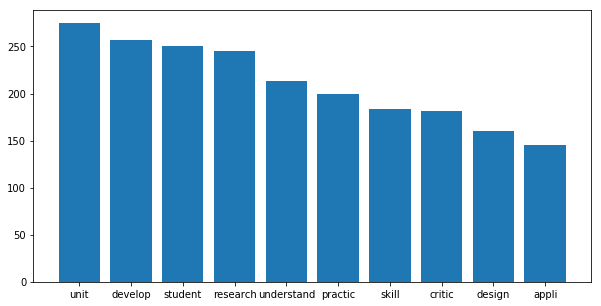

In [44]:
plt.figure(figsize=(10,5))
plt.bar(range(len(plot)), list(plot.values()), align='center')
plt.xticks(range(len(plot)), list(plot.keys()))
plt.show()

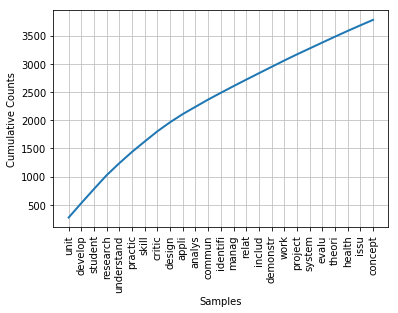

In [45]:
tokens_frequent.plot(25, cumulative=True)

Plotting frequency of frequency using a bar chart

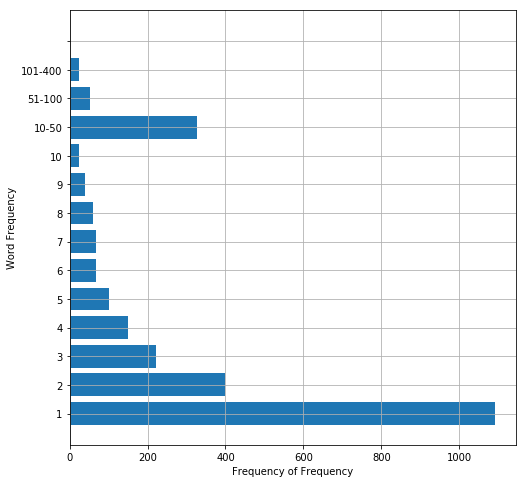

In [46]:
# Applying frequency distribution function on all the values of the tokens(k,v) which will have the frequency count
fd = FreqDist(tokens_frequent.values())

y = [0]*14
for k, v in fd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 50:
        y[10] =  y[10] + v
     elif k >50 and k <= 100:
        y[11] =  y[11] + v
     elif k > 100 and k <= 500:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
figure(figsize=(8,8))
x = range(1, 15) 
ytks =list(map(str, range(1, 11))) 
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-400')
barh(x,y)
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
grid(True)

## Summary

* Extracted data from PDF tables
* Loaded the data into Dataframe
* Completed word Tokenization
* Did Case Normalization
* Removed stop words
* Stemming technique
* Performed Count vectorization
* Plotted charts of frequencies